### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
# Agregar columna de tienda a cada dataframe
tienda1['tienda'] = 'Tienda 1'
tienda2['tienda'] = 'Tienda 2'
tienda3['tienda'] = 'Tienda 3'
tienda4['tienda'] = 'Tienda 4'

# Combinar todos los datos
df_completo = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Verificar y limpiar datos
print("Información del dataset combinado:")
print(df_completo.info())
print("\nValores nulos:")
print(df_completo.isnull().sum())

# Convertir columnas numéricas si es necesario
df_completo['Precio'] = pd.to_numeric(df_completo['Precio'], errors='coerce')
df_completo['Costo de envío'] = pd.to_numeric(df_completo['Costo de envío'], errors='coerce')
df_completo['Calificación'] = pd.to_numeric(df_completo['Calificación'], errors='coerce')


# Eliminar filas con valores nulos en columnas importantes
df_completo = df_completo.dropna(subset=['Precio', 'Costo de envío', 'Calificación'])

Información del dataset combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 958.4+ KB

#1. Análisis de facturación



In [ ]:
# Calcular facturación total por tienda
facturacion_por_tienda = df_completo.groupby('tienda')['Precio'].sum()
print("Facturación total por tienda:")
print(facturacion_por_tienda)

# Facturación promedio por venta
facturacion_promedio = df_completo.groupby('tienda')['Precio'].mean()
print("\nFacturación promedio por venta:")
print(facturacion_promedio)

Facturación total por tienda:
tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64

Facturación promedio por venta:
tienda
Tienda 1    487867.910131
Tienda 2    473227.426876
Tienda 3    465459.771089
Tienda 4    440362.892282
Name: Precio, dtype: float64


# 2. Ventas por categoría

In [ ]:
# Ventas por categoría en todas las tiendas
ventas_por_categoria = df_completo.groupby('Categoría del Producto').size().sort_values(ascending=False)
print("Ventas por categoría:")
print(ventas_por_categoria)

# Ventas por categoría por tienda
ventas_categoria_tienda = df_completo.groupby(['tienda', 'Categoría del Producto']).size().unstack(fill_value=0)
print("\nVentas por categoría por tienda:")
print(ventas_categoria_tienda)

Ventas por categoría:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
dtype: int64

Ventas por categoría por tienda:
Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
tienda                                                                  
Tienda 1                                    171                   284   
Tienda 2                                    181                   275   
Tienda 3                                    177                   277   
Tienda 4                                    201                   277   

Categoría del Producto  Electrodomésticos  Electrónicos  \
tienda                                                    
Tienda 1                              312           448   
Tienda 2                            

# 3. Calificación promedio de la tienda


In [ ]:
calificacion_promedio = df_completo.groupby('tienda')['Calificación'].mean()
print("Calificación promedio por tienda:")
print(calificacion_promedio.round(2))

Calificación promedio por tienda:
tienda
Tienda 1    3.98
Tienda 2    4.04
Tienda 3    4.05
Tienda 4    4.00
Name: Calificación, dtype: float64


# 4. Productos más y menos vendidos

In [26]:
# Productos más vendidos (top 10)
productos_mas_vendidos = df_completo['Producto'].value_counts().head(10)
print("Productos más vendidos:")
print(productos_mas_vendidos)

# Productos menos vendidos (últimos 10)
productos_menos_vendidos = df_completo['Producto'].value_counts().tail(10)
print("\nProductos menos vendidos:")
print(productos_menos_vendidos)

# Por tienda
for tienda in df_completo['tienda'].unique():
    print(f"\nTienda {tienda}:")
    print("Top 5 productos:")
    print(df_completo[df_completo['tienda'] == tienda]['Producto'].value_counts().head(5))

Productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64

Productos menos vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64

Tienda Tienda 1:
Top 5 productos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Tienda Tienda

# 5. Envío promedio por tienda

In [27]:
Costo_envio_promedio = df_completo.groupby('tienda')['Costo de envío'].mean()
print("Costo promedio de envío por tienda:")
print(Costo_envio_promedio.round(2))

# Relación costo envío vs precio
relacion_envio_precio = (df_completo.groupby('tienda')['Costo de envío'].mean() /
                        df_completo.groupby('tienda')['Precio'].mean()) * 100
print("\nPorcentaje de costo de envío sobre precio promedio:")
print(relacion_envio_precio.round(2))

Costo promedio de envío por tienda:
tienda
Tienda 1    26018.61
Tienda 2    25216.24
Tienda 3    24805.68
Tienda 4    23459.46
Name: Costo de envío, dtype: float64

Porcentaje de costo de envío sobre precio promedio:
tienda
Tienda 1    5.33
Tienda 2    5.33
Tienda 3    5.33
Tienda 4    5.33
dtype: float64


###Conclusiones

In [28]:
# Análisis comparativo completo
print("=== ANÁLISIS COMPARATIVO COMPLETO ===")

# Crear dataframe resumen
resumen_tiendas = pd.DataFrame({
    'Facturación Total': facturacion_por_tienda,
    'Facturación Promedio': facturacion_promedio,
    'Calificación Promedio': calificacion_promedio,
    'Costo Envío Promedio': Costo_envio_promedio,
    'Porcentaje Envío/Precio': relacion_envio_precio,
    'Total Ventas': df_completo.groupby('tienda').size()
})

print(resumen_tiendas.round(2))

# Eficiencia (facturación por costo de envío)
resumen_tiendas['Eficiencia'] = resumen_tiendas['Facturación Total'] / resumen_tiendas['Costo Envío Promedio']
print("\nEficiencia (Facturación/Costo de envío):")
print(resumen_tiendas['Eficiencia'].round(2))

=== ANÁLISIS COMPARATIVO COMPLETO ===
          Facturación Total  Facturación Promedio  Calificación Promedio  \
tienda                                                                     
Tienda 1       1.150880e+09             487867.91                   3.98   
Tienda 2       1.116344e+09             473227.43                   4.04   
Tienda 3       1.098020e+09             465459.77                   4.05   
Tienda 4       1.038376e+09             440362.89                   4.00   

          Costo Envío Promedio  Porcentaje Envío/Precio  Total Ventas  
tienda                                                                 
Tienda 1              26018.61                     5.33          2359  
Tienda 2              25216.24                     5.33          2359  
Tienda 3              24805.68                     5.33          2359  
Tienda 4              23459.46                     5.33          2358  

Eficiencia (Facturación/Costo de envío):
tienda
Tienda 1    44232.97
Tie

### Visualización

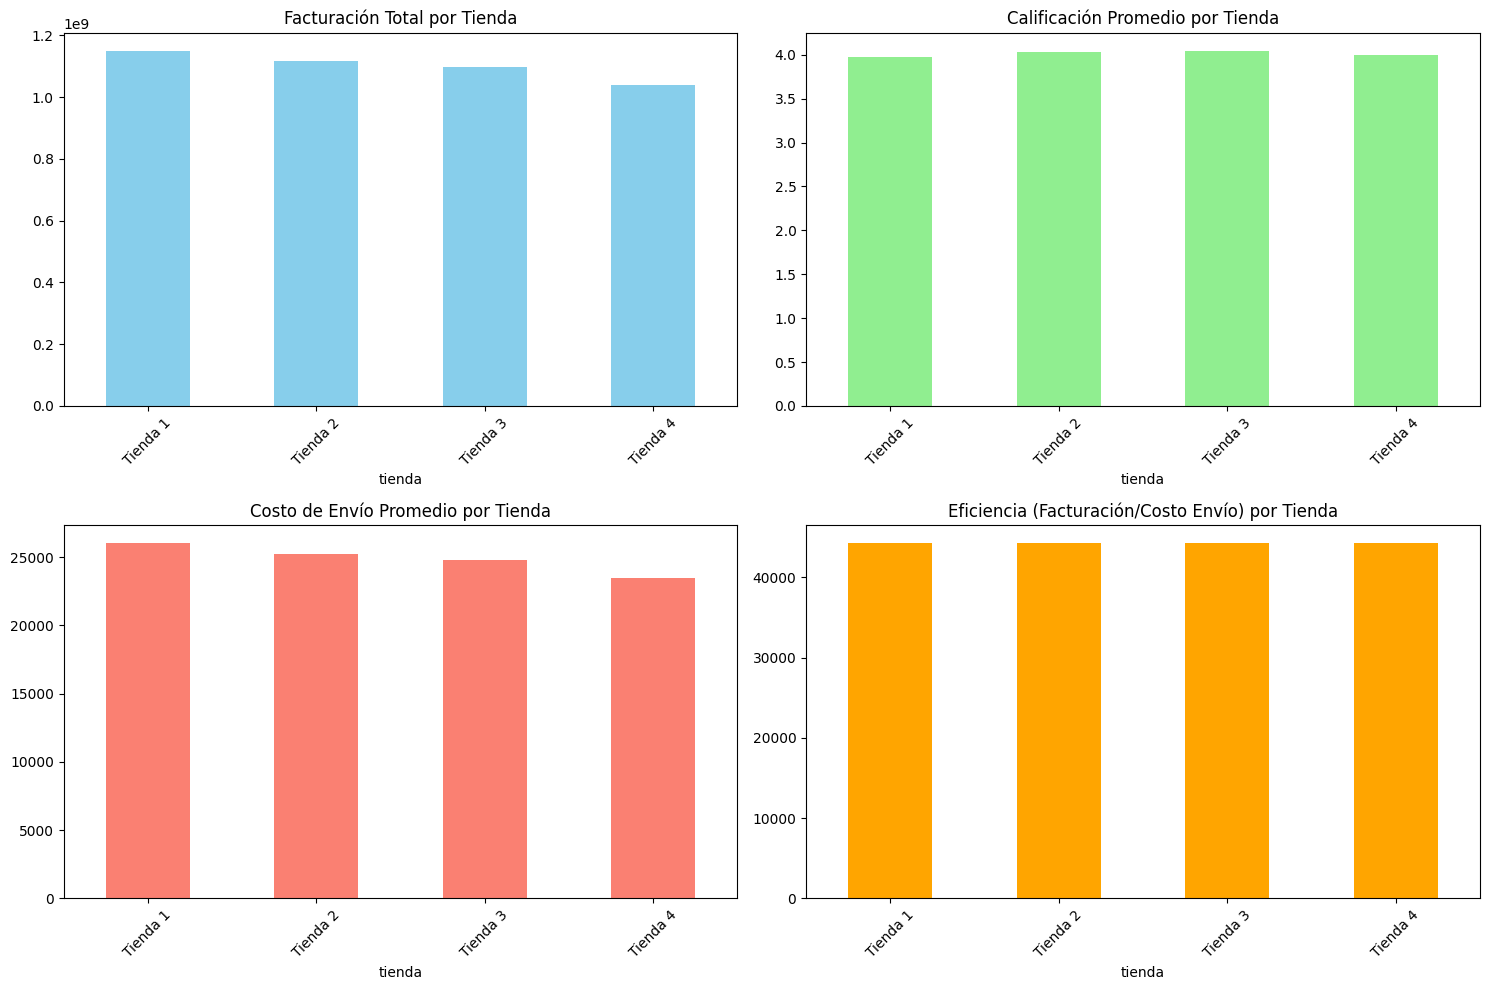

In [29]:
# Gráficos comparativos
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
resumen_tiendas['Facturación Total'].plot(kind='bar', color='skyblue')
plt.title('Facturación Total por Tienda')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
resumen_tiendas['Calificación Promedio'].plot(kind='bar', color='lightgreen')
plt.title('Calificación Promedio por Tienda')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
resumen_tiendas['Costo Envío Promedio'].plot(kind='bar', color='salmon')
plt.title('Costo de Envío Promedio por Tienda')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
resumen_tiendas['Eficiencia'].plot(kind='bar', color='orange')
plt.title('Eficiencia (Facturación/Costo Envío) por Tienda')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Comentario final:

El análisis muestra claramente que la tienda 1 tiene la peor eficiencia operativa(basado en relación a su facturación y costo de envío), junto a otros indicadores clave de desempeño. Por tanto **la tienda 1** es la recomendada para vender.

### Recomendación de tienda a vender

In [30]:
# Identificar la tienda menos eficiente
tienda_menos_eficiente = resumen_tiendas['Eficiencia'].idxmin()
print(f"\nLa tienda menos eficiente es: {tienda_menos_eficiente}")

# Razones para la recomendación
print("\nRazones para recomendar la venta de esta tienda:")
print(f"1. Eficiencia más baja: {resumen_tiendas.loc[tienda_menos_eficiente, 'Eficiencia']:.2f}")
print(f"2. Costo de envío más alto: ${resumen_tiendas.loc[tienda_menos_eficiente, 'Costo Envío Promedio']:.2f}")
print(f"3. Porcentaje envío/precio: {resumen_tiendas.loc[tienda_menos_eficiente, 'Porcentaje Envío/Precio']:.2f}%")

# Comparativa con la mejor tienda
mejor_tienda = resumen_tiendas['Eficiencia'].idxmax()
print(f"\nComparativa con la mejor tienda ({mejor_tienda}):")
print(f"Diferencia en eficiencia: {resumen_tiendas.loc[mejor_tienda, 'Eficiencia'] - resumen_tiendas.loc[tienda_menos_eficiente, 'Eficiencia']:.2f}")


La tienda menos eficiente es: Tienda 1

Razones para recomendar la venta de esta tienda:
1. Eficiencia más baja: 44232.97
2. Costo de envío más alto: $26018.61
3. Porcentaje envío/precio: 5.33%

Comparativa con la mejor tienda (Tienda 2):
Diferencia en eficiencia: 37.85
